<a href="https://colab.research.google.com/github/GuyvDev/DL-HW-Private/blob/main/HW3/ece046211_hw3_seq_tasks_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW3 - Sequential Tasks and Training Methods
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw3_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ece046211_hw3_id1_id2.zip` with content:
        * `ece046211_hw3_id1_id2.ipynb` - the code tasks
        * `ece046211_hw3_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw3` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Masking in Transformers](#-Question-1---Masking-in-Transformers)
    * [Q2 - Preventing Variance Explosion](#-Question-2---Preventing-Variance-Explosion)
    * [Q3 - Recurrent Neural Networks](#-Question-3---Recurrent-Neural-Networks)
* [Part 2 - Code Assignments - Sequence-to-Sequence with Transformers](#-Part-2---Code-Assignments)
    * [Task 1 - Loading and Observing the Data](#-Task-1----Loading-and-Observing-the-Data)
    * [Task 2 - Preparing the Data - Separating to Inputs and Targets](#-Task-2----Preparing-the--Data---Separating-to-Inputs-and-Targets)
    * [Task 3 - Define Hyperparameters and Initialize the Model](#-Task-3----Define-Hyperparameters-and-Initialize-the-Model)
    * [Task 4 - Train and Evaluate the Language Model](#-Task-4----Train-and-Evaluate-the-Language-Model)
    * [Task 5 - Generate Sentences](#-Task-5----Generate-Sentences)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 - Masking in Transformers
---
We examine the classic encoder-decoder transformer model for next-token prediction, and focus on its masking mechanism.

1. Draw a picture of the encoder-decoder transformer model, and qualitatively explain all its parts.
2. Why do we need "Masked self-attention" in the decoder, instead of the regular self attention? Give an example with a specific task.
3. To implement Multi-Head Masked Self-Attention (MHMSA) in the decoder we use
   $$\forall i\in\{1,\ldots,H\}:\ Q_i=XW_i^Q,K_i=XW_i^K, V_i=XW_i^V$$
   $$\mathrm{MHMSA}(X)=\sum_{i=1}^H \mathrm{Softmax}\left (\frac{Q_i K_i^T}{\sqrt{d}}+M\right )V_i W_i^O$$
   Explain how should we choose $M ∈ R^{T× T}$ to implement masking based on the expression for MHMSA above, and why this works.
   
4. Why do we not require masking in the Multi-Head Self-Attention (MHSA) right after the MHMSA? Base your answer on the mathematical expression for the MHSA.
5. Explain the difference in operation of the MHMSA in training and inference. Which method is faster (assuming modern GPU hardware)?
6. A researcher though it might be useful if (similarly to vision models) we add a "max-pooling" layer with pooling size 2 on the token dimension at the end of the first decoder blocks (after the fully connected layers), to reduce its size from $T$ to $T/2$, and then extend it back to the original $T$ (e.g., by replicating the tokens) before the last decoder block. Explain why is this problematic (hint: it is related to the reason we need masking), and how to fix the issue above, allowing this max-pooling layer to be added.

## 🧠 QUESTION 1 - SOLUTION: Masking in Transformers
---

We examine the classic encoder-decoder transformer model for next-token prediction, and focus on its masking mechanism.

---

**1. Draw a picture of the encoder-decoder transformer model, and qualitatively explain all its parts.**

The transformer consists of:

- **Encoder**: A stack of identical layers; each layer has:
  - Multi-Head Self-Attention
  - Add & Norm
  - Feed-Forward
  - Add & Norm

- **Decoder**: A stack of identical layers; each layer has:
  - Masked Multi-Head Self-Attention
  - Add & Norm
  - Multi-Head Attention over encoder output
  - Add & Norm
  - Feed-Forward
  - Add & Norm

- **Final Linear + Softmax** layer to predict the next token.




**Diagram was taken from our lectures and appears at the bottom of this code cell, after section 6 of Q1**



---

**2. Why do we need "Masked self-attention" in the decoder, instead of the regular self attention?**

We use masking to prevent the decoder from "cheating" and looking at future tokens during training.  
For example, in machine translation (e.g., translating “I love you” to “Je t’aime”), when generating the translation one word at a time, the model must predict the next word without seeing the future words. Masked self-attention enforces this causality by masking out future positions in the attention computation.

---

**3. How should we choose $M \in \mathbb{R}^{T \times T}$ to implement masking, and why does this work?**

We define the matrix $M$ as:

- $M_{ij} = 0$ if token $j$ is **at or before** token $i$ (allowed to attend)
- $M_{ij} = -\infty$ if token $j$ is **after** token $i$ (should be masked)

This works because in the softmax function:
$$\mathrm{Softmax}\left(\frac{QK^T}{\sqrt{d}} + M\right)$$
positions with $M_{ij} = -\infty$ result in $\exp(-\infty) \approx 0$, so the model assigns zero attention weight to future tokens.

---

**4. Why do we not require masking in the Multi-Head Self-Attention (MHSA) right after the MHMSA?**

The MHSA after MHMSA attends over the encoder outputs, not the decoder outputs.  
Since the encoder output corresponds to the full input sentence (which is fully visible), there is no need for masking — we want the decoder to attend to the **entire input sequence**.

---

**5. Explain the difference in operation of the MHMSA in training and inference. Which method is faster (assuming modern GPU hardware)?**

- **Training**: We compute all tokens in parallel with a mask matrix $M$ that prevents future attention.
- **Inference**: We generate tokens one-by-one, feeding each new token to the decoder and recomputing attention with increasing context.

**Training is faster** on GPUs due to **parallelization**, while inference is inherently **sequential** and slower.

---

**6. Why is it problematic to add a max-pooling layer on the token dimension in the decoder, and how can we fix it?**

Max-pooling across tokens removes fine-grained **positional and sequential information**, and breaks the **causal structure** required by masked attention — pooled tokens might mix information from future tokens, violating the mask assumption.

To fix this:
- Apply **causal-aware pooling**, such as pooling only over **past and current** tokens (e.g., from $[0, i]$ at time $i$)
- Alternatively, apply pooling **after masking** to preserve the causal structure.

---


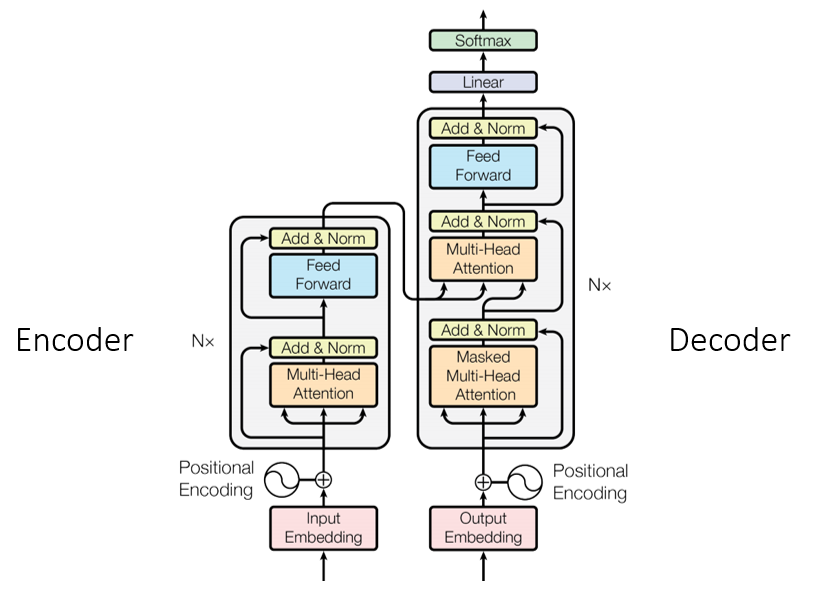

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Preventing Variance Explosion
---
This question relates to lectures 8-9 (from slide 7):

Find an initializtion scheme such that $$ \forall l, i,: \text{(1) } \mathbb{E}\left[F_l(u_l)|u_l\right]=0, \text{ (2) } Var(u_l[i]) = 1, $$ assuming skip connections: $u_{l+1} = u_l + F_l(u_l)$ with a single skip $F_l(u_l)=W_l\phi(u_l)+b_l$ and the activation is ReLU: $\phi(x) = \text{ReLU}(x) = \max(0,x)$.

## 🧠 QUESTION 2 - SOLUTION: Preventing Variance Explosion
---

We are given the recurrence:
$$
u_{l+1} = u_l + F_l(u_l), \quad F_l(u_l) = W_l \phi(u_l) + b_l, \quad \phi(x) = \text{ReLU}(x) = \max(0, x)
$$

We are required to find an initialization scheme such that:

- $\mathbb{E}[F_l(u_l) \mid u_l] = 0$
- $\text{Var}(u_l[i]) = 1$


---

###  Initialization Scheme

To satisfy the conditions:

- **Bias**: Set $$( b_l = 0 )$$

- **Weights**: Initialize $$( W_{l,ij} \sim \mathcal{N}(0, \frac{2}{d}) $$), i.e., **He initialization**

- **Scaling**: Scale the residual connection by $$( \frac{1}{\sqrt{L}} )$$, i.e.,
  $$
  u_{l+1} = u_l + \frac{1}{\sqrt{L}} W_l \phi(u_l)
  $$

---

###  Why this works

- The weights have **zero mean**, so:

  $$
  \mathbb{E}[F_l(u_l)] = \mathbb{E}[W_l \phi(u_l)] = 0
  $$

- He initialization with ReLU ensures:

  $$
  \text{Var}(W_l \phi(u_l)) \approx 1
  $$

- The $$( \frac{1}{\sqrt{L}} )$$ scaling ensures variance **doesn't explode** across layers.

---

 **Both conditions are satisfied.**


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Recurrent Neural Networks
---
You are given a recurrent/feedback neural network with LReLU activations $\phi(u) = \max[pu,u]$, with input $x_t$ and a representation $v_t \in \mathbb{R}^d$ that is updated as follows:
$$ \forall \tau=1,2,...t\:: v_{\tau}=\phi(u_{\tau})\:, u_{\tau} = Wv_{\tau - 1} + B x_{\tau},$$
from initialization $v_0$, and outputs $\hat{y}_t=Cv_t$. The network is trained with GD on a single long series $\{x_{\tau}, y_{\tau}\}_{\tau=1}^t$ with a cost function $\ell(y_t, \hat{y}_t)$ over the last term in the series.

1. Calculate the exact gradient $\frac{\partial \ell}{\partial W[i,j]}$ using Backpropagation through time (BPTT).
2. Recall that calculating the gradient using the method in the previous section there are two issues for $t \to \infty$: (1) the required computational resources grow indefinitely, and (2) the gradients explode or vanish. For each problem: explain it, provide an example for a method to alleviate it and describe any limitations of this method.

## 🧠 QUESTION 3 - SOLUTION: Recurrent Neural Networks
---

We are given an RNN with LReLU activation:
$$
\phi(u) = \max(pu, u)
$$
and recurrence:
$$
\forall \tau = 1, 2, \dots, t: \quad u_\tau = W v_{\tau-1} + B x_\tau, \quad v_\tau = \phi(u_\tau)
$$
The output at time \( t \) is:
$$
\hat{y}_t = C v_t
$$
The loss is calculated only at the final time step:
$$
\ell(y_t, \hat{y}_t)
$$

---

###  1. Calculate the exact gradient $$( \frac{\partial \ell}{\partial W[i,j]} )$$ using BPTT

Let us define:
- $$( \ell_t = \ell(y_t, \hat{y}_t) )$$
- The chain rule is applied through time (Backpropagation Through Time).

We start from the last layer and propagate backward:

$$[
\frac{\partial \ell_t}{\partial W[i,j]} =
\sum_{\tau=1}^{t} \frac{\partial \ell_t}{\partial v_t} \cdot
\frac{\partial v_t}{\partial v_{\tau}} \cdot
\frac{\partial v_{\tau}}{\partial u_{\tau}} \cdot
\frac{\partial u_{\tau}}{\partial W[i,j]}
]$$

Breaking down each component:
- $$( \frac{\partial \ell_t}{\partial v_t} = C^T \cdot \frac{\partial \ell_t}{\partial \hat{y}_t} )$$
- $$( \frac{\partial v_t}{\partial v_{\tau}} )$$ is the product of Jacobians from time $$( \tau )$$ to $$( t )$$
- $$( \frac{\partial v_{\tau}}{\partial u_{\tau}} = \phi'(u_\tau) )$$, where:
  $$[
  \phi'(u) =
  \begin{cases}
  1 & \text{if } u \ge 0 \\
  p & \text{if } u < 0
  \end{cases}
  ]$$
- $$( \frac{\partial u_{\tau}}{\partial W[i,j]} = \delta_{i,:} \cdot v_{\tau-1}[j] )$$

So the full gradient:
$$[
\frac{\partial \ell_t}{\partial W[i,j]} =
\sum_{\tau=1}^{t}
\left( \left( \frac{\partial \ell_t}{\partial v_t} \prod_{k=\tau+1}^{t} J_k \right)
\cdot \phi'(u_\tau) \cdot v_{\tau-1}[j] \right)[i]
]$$
Where $$( J_k = \frac{\partial v_k}{\partial v_{k-1}} )$$ is the Jacobian of one recurrent step.

---

###  2. Problems as $$( t \to \infty )$$

####  (1) Computational cost grows indefinitely
- **Why**: BPTT must store all intermediate activations \( u_\tau, v_\tau \) and backpropagate through all \( t \) steps.
- **Fix**: Use **Truncated BPTT** — limit backpropagation to the last \( k \) steps.
- **Limitation**: The gradient becomes approximate, which may harm long-term dependency learning.

####  (2) Gradients explode or vanish
- **Why**: The repeated multiplication by Jacobians causes numerical instability:
  - If eigenvalues < 1 → gradient vanishes.
  - If eigenvalues > 1 → gradient explodes.

- **Fix**: Use **gradient clipping** (for exploding) and **LSTM/GRU units** (for vanishing).
- **Limitations**:
  - Gradient clipping doesn't address the root cause.
  - LSTM/GRUs add complexity and only partially solve the vanishing gradient problem.

---



### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [ ]:
# this part uses the Wikitext-2 dataset. To access torchtext datasets, please install `torchdata`:
# `pip install torchdata` ir `conda install -c pytorch torchdata` in activated environment
# or `!pip install torchdata` on colab.
!pip install torchdata
# notes:
# torch=2.0.0 <-> torchtext 0.15.1
# torch=1.13.0 <-> torchtext 0.14.0
# torch=1.12.1 <-> torchtext 0.13.1
# downgrading torchtext example: !pip install torchtext==0.13.1 --no-deps
# torchtext requires the `portalocker` package to download datasets:
!pip install portalocker
!pip install torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install torch==2.2.0 torchtext==0.17.0 torchdata==0.7.1 portalocker -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

In [ ]:
# imports for the practice (you can add more if you need)
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math
from typing import Tuple

# pytorch
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

# torchtext
import torchtext
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

In [ ]:
print(f'pytorch: {torch.__version__}, torchtext: {torchtext.__version__}')

pytorch: 2.2.0+cu121, torchtext: 0.17.0+cpu


## <img src="https://img.icons8.com/bubbles/50/000000/workflow.png" style="height:50px;display:inline">  Sequence-to-Sequence with Transformers
---
* In this exercise, you are going to build a language model using PyTroch's Transformer module.
* We will work with the **Wikitext-2** dataset: the WikiText language modeling dataset is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia.
* After training, you will be able to generate senetences!

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1  - Loading and Observing the Data
---
1. Run the following cells that define the functions `batchify` and `data_process` and initialize the tokenizer, vocabulary and the WikiText2 train dataset.
2. Create the train, valid and test data using the provided `batchify` function.
5. Print the shape of `train_data`, write in a comment the meaning of each dimension (e.g. `# [meaning of dim1, meaning of dim2]`).
6. Print the first 20 words of one training sample from `train_data`. Use the vocabulary you built to transfer between tokens to words: `itos = vocab.vocab.get_itos()` will give a "int to string" list.

In [ ]:
def batchify(data, bsz):
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.

    Args:
        data: Tensor, shape [N]
        bsz: int, batch size

    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len = data.size(0) // bsz
    data = data[:seq_len * bsz]
    data = data.view(bsz, seq_len).t().contiguous()
    return data.to(device)

In [ ]:
def data_process(raw_text_iter: dataset.IterableDataset) -> Tensor:
    """Converts raw text into a flat Tensor."""
    data = [torch.tensor(vocab(tokenizer(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

In [ ]:
#train_iter = WikiText2(root="./data", split='train')
#tokenizer = get_tokenizer('basic_english')
#vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
#vocab.set_default_index(vocab['<unk>'])

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda:0


In [ ]:
tokenizer = get_tokenizer('basic_english')

def data_process(raw_text_iter: dataset.IterableDataset, vocab_obj: torchtext.vocab.Vocab, tokenizer_func) -> Tensor:
    """Converts raw text into a flat Tensor using the vocabulary and tokenizer."""
    data = [torch.tensor(vocab_obj(tokenizer_func(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

def batchify(data_tensor: Tensor, bsz: int) -> Tensor:
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.
    Args:
        data_tensor: Tensor, shape [N]
        bsz: int, batch size
    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len_ = data_tensor.size(0) // bsz
    if seq_len_ == 0: # Handle cases where data is too short for any full sequences
        # This might return an empty tensor or raise an error depending on desired behavior for very small datasets
        print(f"Warning: Data length {data_tensor.size(0)} is less than batch size {bsz}. Resulting sequence length is 0.")
        # Return an empty tensor of the correct target shape but with 0 sequence length.
        # Or, handle this specific case as an error or by adjusting bsz if appropriate.
        return torch.empty((0, bsz), dtype=data_tensor.dtype, device=device)

    data_tensor = data_tensor[:seq_len_ * bsz]
    data_tensor = data_tensor.view(bsz, seq_len_).t().contiguous()
    return data_tensor.to(device)

# Define paths and line_iterator helper for local file fallback
data_root_dir = "./data"
# torchtext.datasets.WikiText2 will try to create/use a folder named "wikitext-2" inside `data_root_dir`
dataset_subfolder_name = "wikitext-2"
base_path_for_local_files = os.path.join(data_root_dir, dataset_subfolder_name)

train_file_path = os.path.join(base_path_for_local_files, "wiki.train.tokens")
valid_file_path = os.path.join(base_path_for_local_files, "wiki.valid.tokens")
test_file_path = os.path.join(base_path_for_local_files, "wiki.test.tokens")

def line_iterator(file_path: str):
    """Helper function to yield lines from a local text file."""
    assert os.path.exists(file_path), f"Local data file not found: {file_path}"
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            yield line.strip()

In [ ]:
# --- Build Vocabulary ---
print("\nBuilding vocabulary...")
vocab = None
try:
    # Attempt to use torchtext.datasets.WikiText2
    # Ensure the target directory structure exists or can be created by WikiText2
    # If `./data/WikiText2` (capital T) exists and `./data/wikitext-2` (lowercase t) doesn't, rename.
    capital_t_path = os.path.join(data_root_dir, "WikiText2")
    if os.path.isdir(capital_t_path) and not os.path.isdir(base_path_for_local_files):
        print(f"Renaming local folder '{capital_t_path}' to '{base_path_for_local_files}' for torchtext compatibility.")
        os.rename(capital_t_path, base_path_for_local_files)

    # If base_path_for_local_files still doesn't exist, create it so WikiText2 doesn't try to download to root.
    if not os.path.isdir(base_path_for_local_files):
        os.makedirs(base_path_for_local_files, exist_ok=True)
        print(f"Created directory: {base_path_for_local_files}")

    train_iter_for_vocab = WikiText2(root=data_root_dir, split='train')
    print("Successfully initialized WikiText2 iterator for vocab, proceeding with standard vocab building.")
    vocab = build_vocab_from_iterator(map(tokenizer, train_iter_for_vocab), specials=['<unk>'])

except Exception as e: # Catch HTTPError or other issues like dataset not found locally by WikiText2
    print(f"Standard WikiText2 loading for vocab failed with: {e}")
    print(f"Falling back to manually building vocabulary from local file: {train_file_path}")
    if os.path.exists(train_file_path):
        vocab = build_vocab_from_iterator(map(tokenizer, line_iterator(train_file_path)), specials=['<unk>'])
    else:
        print(f"CRITICAL ERROR: Manual train file path not found: {train_file_path}")
        print("Please ensure your 'wiki.train.tokens' file is at the correct location (e.g., ./data/wikitext-2/wiki.train.tokens).")
        raise FileNotFoundError(f"Missing {train_file_path} for vocabulary building.")

if vocab:
    vocab.set_default_index(vocab['<unk>'])
    print(f"Vocabulary size: {len(vocab)}")
else:
    raise RuntimeError("Vocabulary could not be built.")



Building vocabulary...
Successfully initialized WikiText2 iterator for vocab, proceeding with standard vocab building.
Standard WikiText2 loading for vocab failed with: 403 Client Error: Forbidden for url: https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-2-v1.zip
This exception is thrown by __iter__ of HTTPReaderIterDataPipe(skip_on_error=False, source_datapipe=OnDiskCacheHolderIterDataPipe, timeout=None)
Falling back to manually building vocabulary from local file: ./data/wikitext-2/wiki.train.tokens
Vocabulary size: 28782


In [ ]:
print("\nProcessing datasets into Tensors...")
raw_train_data, raw_val_data, raw_test_data = None, None, None
try:
    # Try standard iterators again for data processing
    train_iter_dp = WikiText2(root=data_root_dir, split='train')
    val_iter_dp = WikiText2(root=data_root_dir, split='valid')
    test_iter_dp = WikiText2(root=data_root_dir, split='test')

    print("Using standard WikiText2 iterators for data processing.")
    raw_train_data = data_process(train_iter_dp, vocab, tokenizer)
    raw_val_data = data_process(val_iter_dp, vocab, tokenizer)
    raw_test_data = data_process(test_iter_dp, vocab, tokenizer)

except Exception as e:
    print(f"Standard WikiText2 loading for data processing failed: {e}")
    print("Falling back to manually loading data from local files.")
    if not (os.path.exists(train_file_path) and os.path.exists(valid_file_path) and os.path.exists(test_file_path)):
        print("CRITICAL ERROR: One or more data files (.tokens) not found for manual processing.")
        print(f"Checked paths:\n - Train: {train_file_path}\n - Valid: {valid_file_path}\n - Test: {test_file_path}")
        raise FileNotFoundError("Missing .tokens files for manual data processing.")

    raw_train_data = data_process(line_iterator(train_file_path), vocab, tokenizer)
    raw_val_data = data_process(line_iterator(valid_file_path), vocab, tokenizer)
    raw_test_data = data_process(line_iterator(test_file_path), vocab, tokenizer)

if raw_train_data is None or raw_val_data is None or raw_test_data is None:
    raise RuntimeError("Raw data could not be processed.")

print(f"Number of tokens in flat training data: {raw_train_data.size(0)}")
print(f"Number of tokens in flat validation data: {raw_val_data.size(0)}")
print(f"Number of tokens in flat test data: {raw_test_data.size(0)}")


# --- Batchify Data (Task 1, step 2) ---
batch_size = 20
eval_batch_size = 10 # For validation and test

print("\nBatchifying data...")
train_data = batchify(raw_train_data, batch_size)
val_data = batchify(raw_val_data, eval_batch_size)
test_data = batchify(raw_test_data, eval_batch_size)
print("Data batching complete.")


Processing datasets into Tensors...
Using standard WikiText2 iterators for data processing.
Standard WikiText2 loading for data processing failed: 403 Client Error: Forbidden for url: https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-2-v1.zip
This exception is thrown by __iter__ of HTTPReaderIterDataPipe(skip_on_error=False, source_datapipe=OnDiskCacheHolderIterDataPipe, timeout=None)
Falling back to manually loading data from local files.
Number of tokens in flat training data: 2049990
Number of tokens in flat validation data: 214417
Number of tokens in flat test data: 241859

Batchifying data...
Data batching complete.


In [ ]:
print(f"\nShape of batched train_data: {train_data.shape}")
# [sequence_length, batch_size]
# Meaning of dimensions for train_data:
# - train_data.shape[0] (First dimension): This is the sequence length.
#   It represents the number of tokens in each sequence after batching.
#   Each column in train_data represents a sequence of this length.
# - train_data.shape[1] (Second dimension): This is the batch size.
#   It represents the number of parallel sequences processed together.
#   train_data[:, i] gives the i-th sequence in the batch.

# 6. Print the first 20 words of one training sample from `train_data`.
itos = vocab.get_itos() # Get integer-to-string mapping list

if train_data.nelement() > 0 and train_data.shape[1] > 0: # Check if train_data is not empty and has batches
    num_words_to_print = min(20, train_data.shape[0])
    if num_words_to_print > 0:
        first_training_sample_tokens = train_data[:num_words_to_print, 0].cpu() # Get first 20 tokens from the first sequence, move to CPU
        first_training_sample_words = [itos[token_id.item()] for token_id in first_training_sample_tokens]
        print(f"\nFirst {num_words_to_print} words of the first training sample (from train_data[:, 0]):")
        print(" ".join(first_training_sample_words))
    else:
        print("\nBatched train_data has sequences of length 0. Cannot print sample words.")
else:
    print("\nBatched train_data is empty or has no batches (batch_size might be too large or data too small). Cannot print sample words.")

# Optional: Print shapes of val_data and test_data to verify
print(f"\nShape of batched val_data: {val_data.shape}")
print(f"Shape of batched test_data: {test_data.shape}")




Shape of batched train_data: torch.Size([102499, 20])

First 20 words of the first training sample (from train_data[:, 0]):
= valkyria chronicles iii = senjō no valkyria 3 <unk> chronicles ( japanese 戦場のヴァルキュリア3 , lit . valkyria of the

Shape of batched val_data: torch.Size([21441, 10])
Shape of batched test_data: torch.Size([24185, 10])


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2  - Preparing the  Data - Separating to Inputs and Targets
---
* For a language modeling task, the model needs the following words as `Target`.
    * For example, for the senetence "I have a nice dog", the model will be given "I have a nice" as input, and "have a nice dog" as the target.
* Implement (complete) the function `get_batch(source, i, bptt)`: it generates the input and target sequence for the transformer model. It subdivides the source data into chunks of length `bptt`.
    * For example, for `bptt=2` and at `i=0`, the output of `data, target = get_batch(train_data, i=0, bptt=2)`: `data` will be of shape (2, 20), where the batch size is 20 and `target` will be of length 40 (the target for each element is two words, but we flatten `target`).
    * Example: for `bptt=2`, and the ABCDEFG... characters as input, our batches will be in the form of: `data=[a, b], target=[b, c]`. For `bptt=3`: `data=[a, b, c], target=[b, c, d]` and so on. This one example is a batch.
    * Print a sample from `data` and `target`.

In [ ]:
bptt_example = 3  # Sequence length for this example
i_example = 0     # Starting index for the chunk from train_data

In [ ]:
def get_batch(source: torch.Tensor, i: int, bptt: int) -> Tuple[torch.Tensor, torch.Tensor]:
    # Calculate the actual sequence length for this batch.
    # It's the minimum of bptt and the remaining length in the source data.
    # We need at least one token for data and one for target, so `len(source) - 1 - i`.
    seq_len = min(bptt, len(source) - 1 - i)

    # Ensure seq_len is not negative, which can happen if i is too close to the end of source.
    if seq_len < 0:
        seq_len = 0 # Or handle as an error/empty tensors

    data = source[i : i + seq_len]
    # Target is the data shifted by one time step.
    target_sequences = source[i + 1 : i + 1 + seq_len]
    # Flatten the target sequences.
    target = target_sequences.reshape(-1) # or .view(-1)
    return data, target

# Check if necessary variables from Task 1 are available
# Ensure 'train_data' and 'itos' are defined from Task 1.
# Also ensure 'device' is defined if 'train_data' is on CUDA.
if 'train_data' not in globals() or not isinstance(train_data, torch.Tensor) or train_data.nelement() == 0:
    print("Error: `train_data` is not available, not a Tensor, or is empty. Please ensure Task 1 has run successfully.")
elif 'itos' not in globals() or not isinstance(itos, list):
    print("Error: `itos` (vocab integer-to-string map) is not available or not a list. Please ensure Task 1 has run successfully.")
else:
    # Check if train_data is long enough.
    # For seq_len to be at least 1 (the smallest meaningful sequence),
    # we need `len(source) - 1 - i >= 1`, so `len(source) >= i + 2`.
    if train_data.shape[0] < i_example + 2:
        print(f"Error: `train_data` (length {train_data.shape[0]}) is too short for i={i_example} and bptt={bptt_example}.")
        print(f"       Need source length >= {i_example + 2} to get a sequence of length at least 1.")
    elif train_data.shape[1] == 0: # Check if batch_size > 0
        print(f"Error: `train_data` has a batch size of 0. Cannot process.")
    else:
        print(f"Using train_data with shape: {train_data.shape}")
        print(f"Calling get_batch with i={i_example}, bptt={bptt_example}")

        # Call get_batch
        data_ex, target_ex = get_batch(train_data, i_example, bptt_example)

        print(f"\nShape of returned data: {data_ex.shape}")
        print(f"Shape of returned target: {target_ex.shape}")

        # Ensure that get_batch actually returned some data (seq_len_ex > 0)
        # data_ex.shape[0] is the actual seq_len returned by get_batch
        if data_ex.shape[0] == 0:
            print("\nWarning: get_batch returned empty data. This can happen if bptt is too small, "
                  "i is too close to the end of the dataset, or if source data is very short.")
        else:
            seq_len_ex = data_ex.shape[0]
            batch_size_ex = data_ex.shape[1]

            # Get the first sequence from the batch (data_ex[:, 0])
            # Move to CPU for .item() if data is on CUDA
            data_seq0_tokens = data_ex[:, 0].cpu()
            data_seq0_words = [itos[token.item()] for token in data_seq0_tokens]

            # Extract the corresponding target tokens for this first sequence
            # Target for data_ex[t, 0] is target_ex[t * batch_size_ex + 0] (for the first item in batch)
            target_seq0_token_ids = []
            if target_ex.nelement() > 0: # Check if target_ex is not empty
                for t_idx in range(seq_len_ex):
                    # Calculate index in the flattened target array
                    target_idx_in_flat_array = t_idx * batch_size_ex + 0 # 0 for the first sequence in batch
                    # Boundary check for target_ex
                    if target_idx_in_flat_array < target_ex.size(0):
                         target_seq0_token_ids.append(target_ex[target_idx_in_flat_array].item())
                    else:
                        print(f"Warning: Attempted to access target_ex out of bounds at index {target_idx_in_flat_array} while reconstructing target words.")
                        break # Avoid further errors

            target_seq0_words = [itos[token_id] for token_id in target_seq0_token_ids]

            print(f"\nSample for the first sequence in the batch (batch_index=0):")
            print(f"Data words:   {data_seq0_words}")
            print(f"Target words: {target_seq0_words}")

            if len(data_seq0_words) == len(target_seq0_words) and len(data_seq0_words) > 0 : # Ensure we have words to verify
                print("\nVerification (data_word[k] --> target_word[k]):")
                for k in range(len(data_seq0_words)):
                    print(f"  '{data_seq0_words[k]}' ({data_seq0_tokens[k].item()}) --> '{target_seq0_words[k]}' ({target_seq0_token_ids[k]})")

                # Additional check for shifted relationship
                if seq_len_ex > 1:
                    # target_words[:-1] should be equal to data_words[1:]
                    # e.g. data = [a,b,c], target = [b,c,d]
                    # target[:-1] = [b,c], data[1:] = [b,c]
                    match = all(data_seq0_words[j+1] == target_seq0_words[j] for j in range(seq_len_ex - 1))
                    if match:
                        print("\nShifted relationship (target_words[:-1] == data_words[1:]) verified.")
                    else:
                        print("\nError in shifted relationship (target_words[:-1] != data_words[1:]). This indicates a potential issue.")
            elif len(data_seq0_words) == 0:
                print("\nNo data words to verify.")
            else:
                 print("\nMismatch in length between data and target words for verification.")


Using train_data with shape: torch.Size([102499, 20])
Calling get_batch with i=0, bptt=3

Shape of returned data: torch.Size([3, 20])
Shape of returned target: torch.Size([60])

Sample for the first sequence in the batch (batch_index=0):
Data words:   ['=', 'valkyria', 'chronicles']
Target words: ['valkyria', 'chronicles', 'iii']

Verification (data_word[k] --> target_word[k]):
  '=' (9) --> 'valkyria' (3849)
  'valkyria' (3849) --> 'chronicles' (3869)
  'chronicles' (3869) --> 'iii' (881)

Shifted relationship (target_words[:-1] == data_words[1:]) verified.


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3  - Define Hyperparameters and Initialize the Model
---
* Define the following hyperparameters (`[a, b]` means in the range between `a` and `b`):
    * Embedding size: choose from `[200, 250]`
    * Number of hidden units: choose from `[200, 250]`
    * Number of layers: choose from `[2, 4]`
    * Number of attention heads: choose from `[2, 4]`
    * Dropout: choose from `[0.0, 0.3]`
    * Loss criterion: `nn.CrossEntropyLoss()`
    * Optimizer: choose from `[SGD, Adam, RAdam]`
    * Learning rate: choose from `[5e-3, 5.0]`
    * Learning Scheduler: `torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)` or any scheduler of your choosing.
    * Transformer LayerNormalization: `post` (`norm_first=False`) or `pre` (`norm_first=True`).
* Intialize an instance of `TransformerModel` (given) and send it to `device`. Note that you need to give it the number of tokens to define the output of the decoder. You should use the number of tokens in the vocabulary. Print the number of tokens,  print **all** the chosen hyper-parameters and print the model (`print(model`).

In [ ]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5, norm_first=False):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout, norm_first=norm_first)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

In [ ]:
print("\n--- Task 3: Model Initialization and Hyperparameters ---")

# Ensure 'vocab' and 'device' from previous tasks are available
if 'vocab' not in globals():
    raise NameError("Vocabulary 'vocab' not found. Please ensure Task 1 has run successfully.")
if 'device' not in globals():
    raise NameError("Device 'device' not found. Please ensure Task 1 has run successfully.")

# Number of tokens from vocabulary (Task 1)
ntokens = len(vocab)

# 1. Define Hyperparameters (chosen from the given ranges)
emsize = 200                # Embedding size (ninp for the model). Range: [200, 250]
nhid = 200                  # Number of hidden units in FFN (dim_feedforward). Range: [200, 250]
nlayers = 2                 # Number of Transformer encoder layers. Range: [2, 4]
nhead = 2                   # Number of attention heads. Range: [2, 4]. Must divide emsize.
dropout_rate = 0.2          # Dropout rate. Range: [0.0, 0.3]
norm_first_hyperparam = True # Transformer LayerNormalization: True for 'pre', False for 'post'.

# Check if emsize is divisible by nhead
if emsize % nhead != 0:
    raise ValueError(f"Embedding size ({emsize}) must be divisible by the number of attention heads ({nhead}).")

# Loss Criterion
criterion = nn.CrossEntropyLoss()

# Optimizer choice and Learning Rate
optimizer_name = "SGD"       # Chosen from [SGD, Adam, RAdam]
learning_rate = 5.0         # Chosen from [5e-3, 5.0]. (0.005 for Adam is reasonable)

# 2. Initialize an instance of TransformerModel and send it to device
model = TransformerModel(
    ntoken=ntokens,
    ninp=emsize,
    nhead=nhead,
    nhid=nhid,
    nlayers=nlayers,
    dropout=dropout_rate,
    norm_first=norm_first_hyperparam
).to(device)

# Initialize Optimizer (needs model.parameters())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Initialize Learning Rate Scheduler
# Using the suggested StepLR: torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.95)


# 3. Print the required information
print(f"Number of tokens (vocabulary size): {ntokens}")

print("\nChosen Hyperparameters:")
print(f"  Embedding size (ninp): {emsize}")
print(f"  Number of hidden units (nhid for TransformerEncoderLayer's FFN): {nhid}")
print(f"  Number of encoder layers (nlayers): {nlayers}")
print(f"  Number of attention heads (nhead): {nhead}")
print(f"  Dropout rate: {dropout_rate}")
norm_type_str = "'pre' (norm_first=True)" if norm_first_hyperparam else "'post' (norm_first=False)"
print(f"  Transformer LayerNormalization: {norm_type_str}")
print(f"  Loss criterion: {type(criterion).__name__}")
print(f"  Optimizer: {optimizer_name}")
print(f"  Initial Learning Rate: {learning_rate}")
print(f"  Learning Rate Scheduler: StepLR(optimizer, step_size={scheduler.step_size}, gamma={scheduler.gamma})")


print("\nModel Architecture:")
print(model)

# Verify model is on the correct device
if hasattr(model, 'encoder'): # Check if model has parameters to check device for
    print(f"\nModel is on device: {next(model.parameters()).device}")
else: # Should not happen with this model structure
    print("\nModel has no parameters to check device for.")




--- Task 3: Model Initialization and Hyperparameters ---


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Number of tokens (vocabulary size): 28782

Chosen Hyperparameters:
  Embedding size (ninp): 200
  Number of hidden units (nhid for TransformerEncoderLayer's FFN): 200
  Number of encoder layers (nlayers): 2
  Number of attention heads (nhead): 2
  Dropout rate: 0.2
  Transformer LayerNormalization: 'pre' (norm_first=True)
  Loss criterion: CrossEntropyLoss
  Optimizer: SGD
  Initial Learning Rate: 5.0
  Learning Rate Scheduler: StepLR(optimizer, step_size=1.0, gamma=0.95)

Model Architecture:
TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=200, out_features=200, bias=True)
        )
        (linear1): Linear(in_features=200, out_features=200, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (line

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4  - Train and Evaluate the Language Model
---
* Fill in the missing line in the training code and train the model.
* Use `bptt=35`.
* Use the provided function to evaluate it on the validatation set (after each epoch) and on test test (after training is done). **Print and plot** the results (loss and perplexity).
* If you see that the performance does not improve, go back to Task 3 and re-think you hyper-parameters.

In [ ]:
import copy
def evaluate(model, eval_data):
    model.eval()  # turn on evaluation mode
    total_loss = 0.
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, eval_data.size(0) - 1, bptt):
            data, targets = get_batch(eval_data, i, bptt)
            seq_len = data.size(0)
            if seq_len != bptt:
                src_mask = src_mask[:seq_len, :seq_len]
            output = model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += seq_len * criterion(output_flat, targets).item()
    return total_loss / (len(eval_data) - 1)

In [ ]:
# Ensure necessary variables from previous tasks are available
required_vars = ['model', 'optimizer', 'scheduler', 'criterion', 'train_data', 'val_data', 'test_data', 'ntokens', 'device', 'get_batch']
for var_name in required_vars:
    if var_name not in globals():
        raise NameError(f"Variable '{var_name}' not found. Please ensure Tasks 1-3 have run successfully.")

def train(model, bptt):
    model.train()  # turn on train mode
    total_loss = 0.
    log_interval = 200
    start_time = time.time()
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)

    num_batches = len(train_data) // bptt
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i, bptt)
        seq_len = data.size(0)
        if seq_len != bptt:  # only on last batch
            src_mask = src_mask[:seq_len, :seq_len]
        output = model(data, src_mask)
        loss =  criterion(output.view(-1, ntokens), targets)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            print(f'| epoch {epoch:3d} | {batch:5d}/{num_batches:5d} batches | '
                  f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            total_loss = 0
            start_time = time.time()


--- Task 4: Model Training and Evaluation ---
Starting training for 5 epochs with bptt=35...
Using device: cuda:0
| epoch   1 |   200/ 2928 batches | lr 5.00 | ms/batch 15.95 | loss  7.80 | ppl  2430.73
| epoch   1 |   400/ 2928 batches | lr 5.00 | ms/batch 13.74 | loss  6.88 | ppl   977.23
| epoch   1 |   600/ 2928 batches | lr 5.00 | ms/batch 13.67 | loss  6.53 | ppl   685.96
| epoch   1 |   800/ 2928 batches | lr 5.00 | ms/batch 13.45 | loss  6.42 | ppl   614.26
| epoch   1 |  1000/ 2928 batches | lr 5.00 | ms/batch 16.12 | loss  6.34 | ppl   564.84
| epoch   1 |  1200/ 2928 batches | lr 5.00 | ms/batch 15.85 | loss  6.29 | ppl   537.42
| epoch   1 |  1400/ 2928 batches | lr 5.00 | ms/batch 13.90 | loss  6.25 | ppl   519.74
| epoch   1 |  1600/ 2928 batches | lr 5.00 | ms/batch 13.54 | loss  6.25 | ppl   517.48
| epoch   1 |  1800/ 2928 batches | lr 5.00 | ms/batch 13.50 | loss  6.16 | ppl   473.77
| epoch   1 |  2000/ 2928 batches | lr 5.00 | ms/batch 13.51 | loss  6.14 | ppl   46

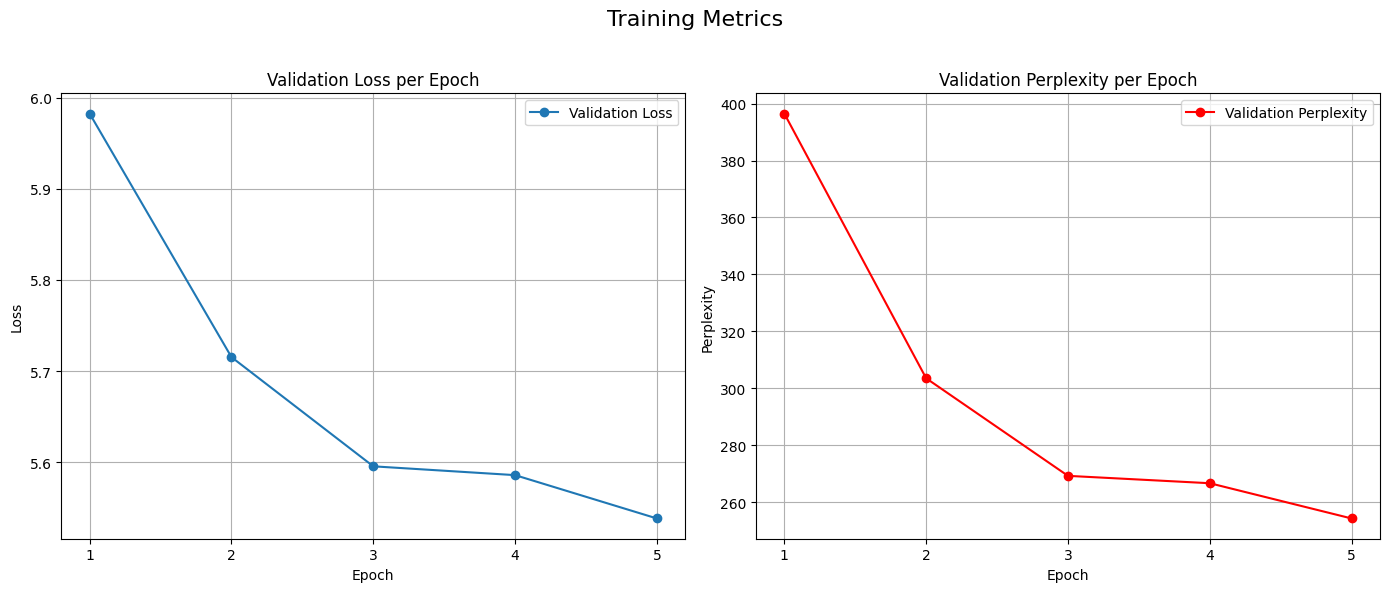

In [ ]:
best_val_loss = float("inf")
epochs = 5
best_model = None
bptt = 35

# Lists to store metrics for plotting
val_losses_history = []
val_ppls_history = []
epochs_ran_for_plot = []

print(f"\n--- Task 4: Model Training and Evaluation ---")
print(f"Starting training for {epochs} epochs with bptt={bptt}...")
print(f"Using device: {device}")


for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(model, bptt)
    val_loss = evaluate(model, val_data)
    val_ppl = math.exp(val_loss) if val_loss < 100 else float('inf')
    # Store metrics for plotting
    val_losses_history.append(val_loss)
    val_ppls_history.append(val_ppl)
    epochs_ran_for_plot.append(epoch)

    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

# Save the best model state
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        # Instead of 'best_model = model', save the model's state dictionary
        best_model_state = copy.deepcopy(model.state_dict())
        print(f"New best validation loss: {best_val_loss:.2f}. Model state saved for epoch {epoch}.")

    # Step the learning rate scheduler. 'scheduler' is global.
    scheduler.step()

# --- After training loop ---

# Load the best model state for final evaluation on the test set
if best_model_state:
    print("\nLoading best model state for test evaluation...")
    model.load_state_dict(best_model_state)
else:
    print("\nNo best model state was saved (e.g., validation loss didn't improve or only 1 epoch run). Evaluating current model state.")

# Evaluate on the test set
# 'evaluate' uses the (potentially updated) global 'model', 'test_data'.
test_loss = evaluate(model, test_data)
test_ppl = math.exp(test_loss) if test_loss < 100 else float('inf')

print('=' * 89)
print(f'| End of training | test loss {test_loss:5.2f} | test ppl {test_ppl:8.2f}')
print('=' * 89)

# --- Plotting the results ---
if epochs_ran_for_plot: # Check if any epochs were run and data was collected
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_ran_for_plot, val_losses_history, label='Validation Loss', marker='o', linestyle='-')
    plt.title('Validation Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    if len(epochs_ran_for_plot) <= 10 : # Avoid cluttered x-axis if many epochs
         plt.xticks(epochs_ran_for_plot)
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_ran_for_plot, val_ppls_history, label='Validation Perplexity', marker='o', linestyle='-', color='r')
    plt.title('Validation Perplexity per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Perplexity')
    if len(epochs_ran_for_plot) <= 10 : # Avoid cluttered x-axis if many epochs
         plt.xticks(epochs_ran_for_plot)
    plt.legend()
    plt.grid(True)

    plt.suptitle('Training Metrics', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
    plt.show()
else:
    print("No epochs were run or no data collected for plotting.")


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 5  - Generate Sentences
---
Use the following function to generate 3 sentences of length 20, and print them. Do they make sense? (you can compare generated sentences over epochs, to see if some logic is gained during training).

In [ ]:
def generate(model, vocab, nwords=100, temp=1.0):
    model.eval()
    ntokens = len(vocab)
    itos = vocab.vocab.get_itos()
    model_input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)
    words = []
    with torch.no_grad():
        for i in range(nwords):
            output = model(model_input, None)
            word_weights = output[-1].squeeze().div(temp).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0]
            word_tensor = torch.Tensor([[word_idx]]).long().to(device)
            model_input = torch.cat([model_input, word_tensor], 0)
            word = itos[word_idx]
            words.append(word)
    return words

In [ ]:
print("\n--- Task 5: Generating Sentences ---")

# Ensure the model is loaded with the best weights and is on the correct device
if 'model' not in globals() or not isinstance(model, torch.nn.Module):
    raise NameError("Model 'model' not found or not a PyTorch Module. Ensure Task 3 & 4 ran successfully.")
if 'vocab' not in globals():
    raise NameError("Vocabulary 'vocab' not found. Ensure Task 1 ran successfully.")
if 'best_model_state' in globals() and best_model_state is not None:
    print("Ensuring model is using the best saved state for generation...")
    model.load_state_dict(best_model_state) # Load best model state if available
model.to(device) # Ensure model is on the right device
model.eval() # Set model to evaluation mode for generation

num_sentences_to_generate = 3
sentence_length = 20
temperature = 1.0  # Standard temperature; can be experimented with

print(f"\nGenerating {num_sentences_to_generate} sentences, each of length {sentence_length} words, with temperature={temperature}:")

for i in range(num_sentences_to_generate):
    # It's good practice to re-initialize the starting token for each new sentence
    # The `generate` function does this internally with `torch.randint(ntokens, (1, 1), ...)`
    generated_word_list = generate(model, vocab, nwords=sentence_length, temp=temperature)
    generated_sentence = " ".join(generated_word_list)
    print(f"\nSentence {i+1}:")
    print(generated_sentence)



--- Task 5: Generating Sentences ---
Ensuring model is using the best saved state for generation...

Generating 3 sentences, each of length 20 words, with temperature=1.0:

Sentence 1:
they have been left old . riders worked in the wind and commercial buildings . . even impressed by small

Sentence 2:
into the dodos , a powerful fox mulder , head , both the king ' s death . johnston left

Sentence 3:
. his solo works to speak for the part of manga critic and <unk> , she used in the relationship


---

### Analysis: Does the Generated Text Make Sense?
---
No, the generated sentences are not semantically coherent.

While the model attempts to use punctuation in syntactically plausible locations—even correctly forming a possessive with an apostrophe (king ' s)—it also makes fundamental errors, such as starting a sentence with a period or using a double period. This demonstrates that it has learned statistical patterns but lacks a true understanding of sentence structure.

This syntactic confusion is overshadowed by a complete failure in semantics. The sentences have no logical flow, jumping between unrelated topics like "dodos" and "fox mulder." Logical errors, like the pronoun switch from "his" to "she," further confirm that the model is not tracking context.

In conclusion, the model operates as a statistical pattern matcher, not a true language comprehender, which is an expected outcome for a model of this scale.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/